### Exploratory Data Analysis

##### 02_EDA_StudentsDropout

## Steps

1. Visualised general data variables.
2. Converted numerical categorical variables to string labels.
3. Encoded the target variable into numerical values.
4. Computed the correlation matrix.
5. Visualised the correlation matrix using a heatmap.

### Import required packages

In [210]:
# Import required packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Load raw data

In [211]:
# Read the CSV back into a DataFrame
try:
    df_raw = pd.read_csv('data/row_data.csv')
    print("Data loaded successfully from CSV.")
except Exception as e:
    print(f"""Error reading CSV into DataFrame, 
          Check 01_Predict_Students_Dropout_Get_Raw_Data notebook: {e}""")
    raise

Data loaded successfully from CSV.


### Inspect the data 

In [212]:
# Display the df_raw DataFrame
display(df_raw.head(5))  # Display the df_raw DataFrame in a Jupyter Notebook or interactive environment

# Check the shape of the df_raw DataFrame to see the number of rows and columns
df_raw.shape  # Returns a tuple representing the dimensionality of the DataFrame (number of rows, number of columns)

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


(4424, 37)

### Encoding the Target and Correlation Analysis

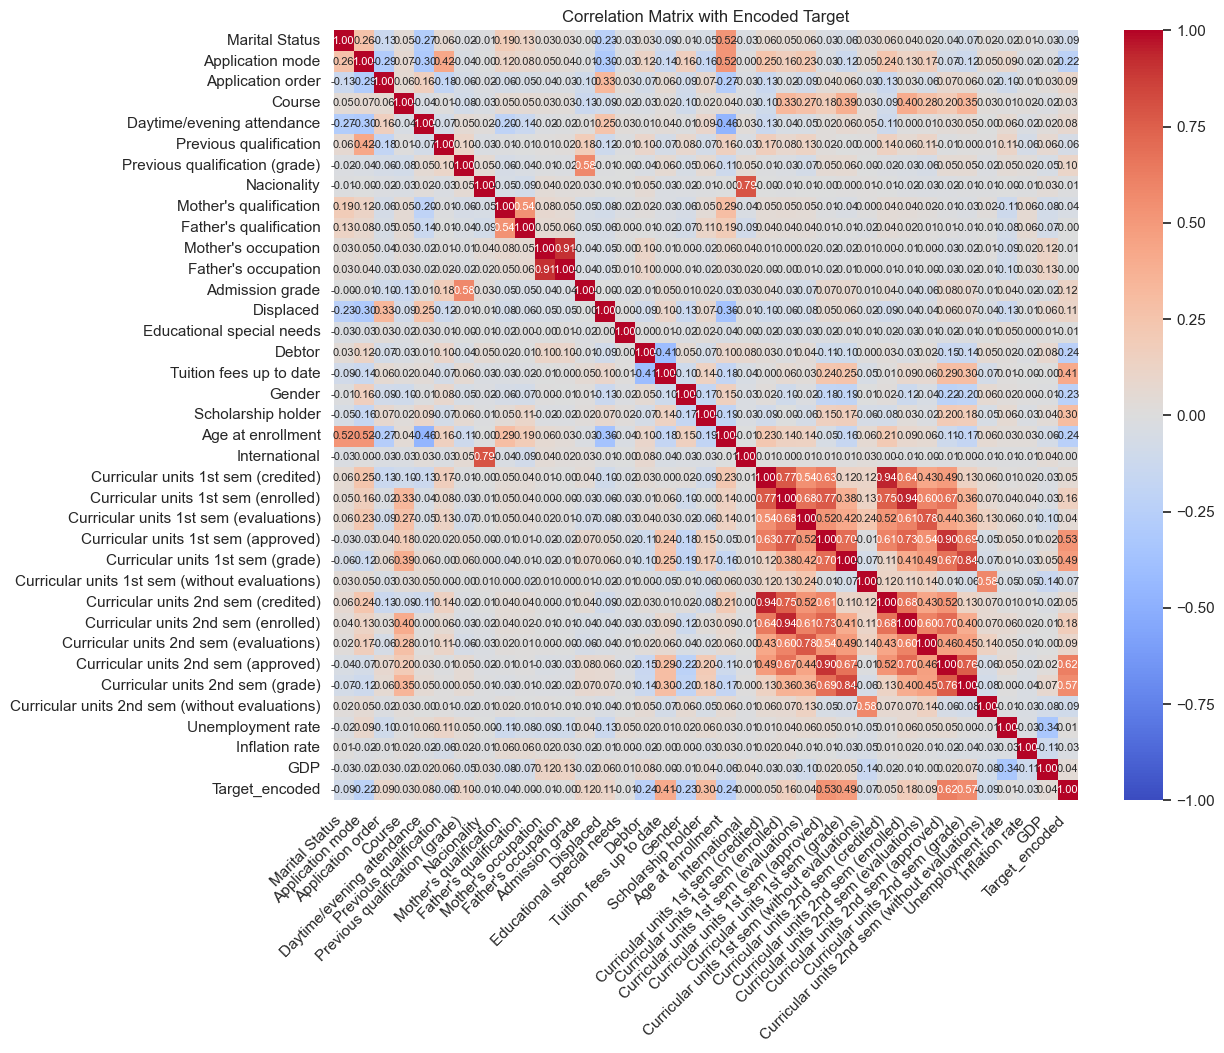

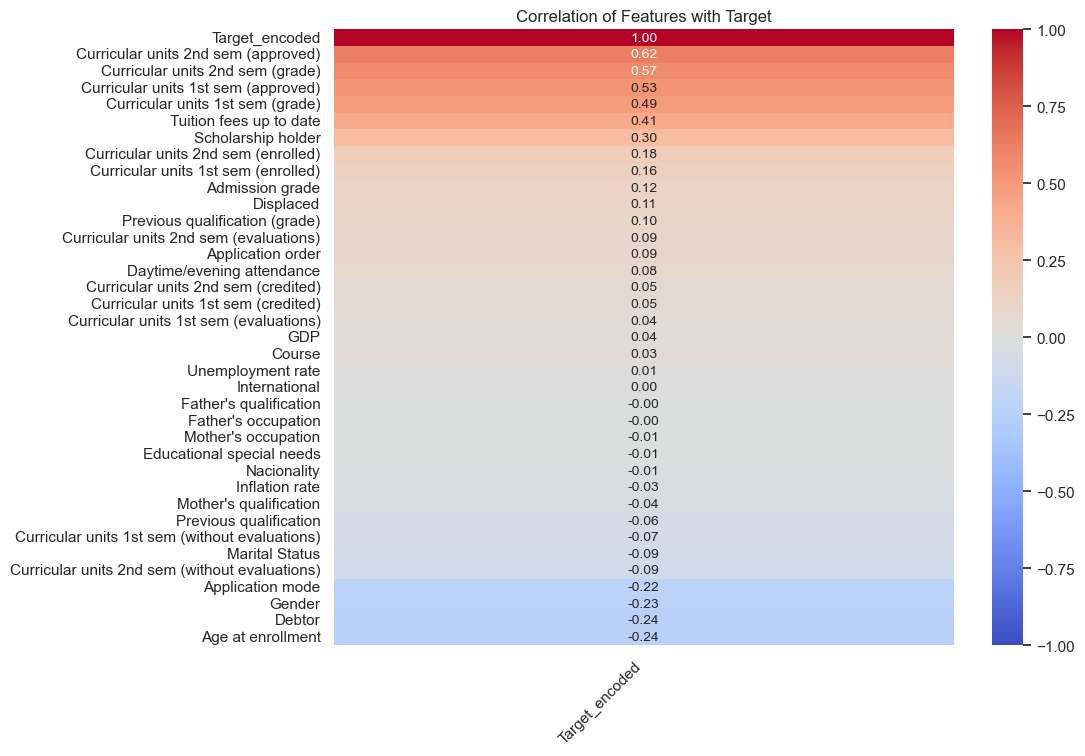

Apparently, correlation between features are low except for Nationality and International. We can drop these features in the regression model for predicting student target


In [213]:
# Encode the 'Target' column into numerical values
label_encoder = LabelEncoder()
df_raw['Target_encoded'] = label_encoder.fit_transform(df_raw['Target'])

# Compute the correlation matrix excluding the original 'Target' column
correlation_matrix = df_raw.drop(columns=['Target']).corr()

# Create the heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, annot_kws={"size": 8})
plt.title('Correlation Matrix with Encoded Target')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# To focus on the correlation of features with the target only
plt.figure(figsize=(10, 8))
target_corr = correlation_matrix[['Target_encoded']].sort_values(by='Target_encoded', ascending=False)
sns.heatmap(target_corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, annot_kws={"size": 10})
plt.title('Correlation of Features with Target')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

print('Apparently, correlation between features are low except for Nationality and International. We can drop these features in the regression model for predicting student target')


### Defining Categorical and Quantitative Columns

In [214]:
# Defining categorical and quantitative columns based on the above checks and metadata description
categorical_cols = ["Marital Status", "Application mode", "Application order", "Course", "Daytime/evening attendance",
                    "Previous qualification", "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation",
                    "Father's occupation", "Displaced", "Educational special needs", "Debtor", "Tuition fees up to date", "Gender",
                    "Scholarship holder", "International", "Target"]

quantitative_cols = ['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
                  'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
                  'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
                  'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
                  'Age at enrollment', 'Inflation rate', 'GDP', 'Unemployment rate']

### Visualising Categorical Columns

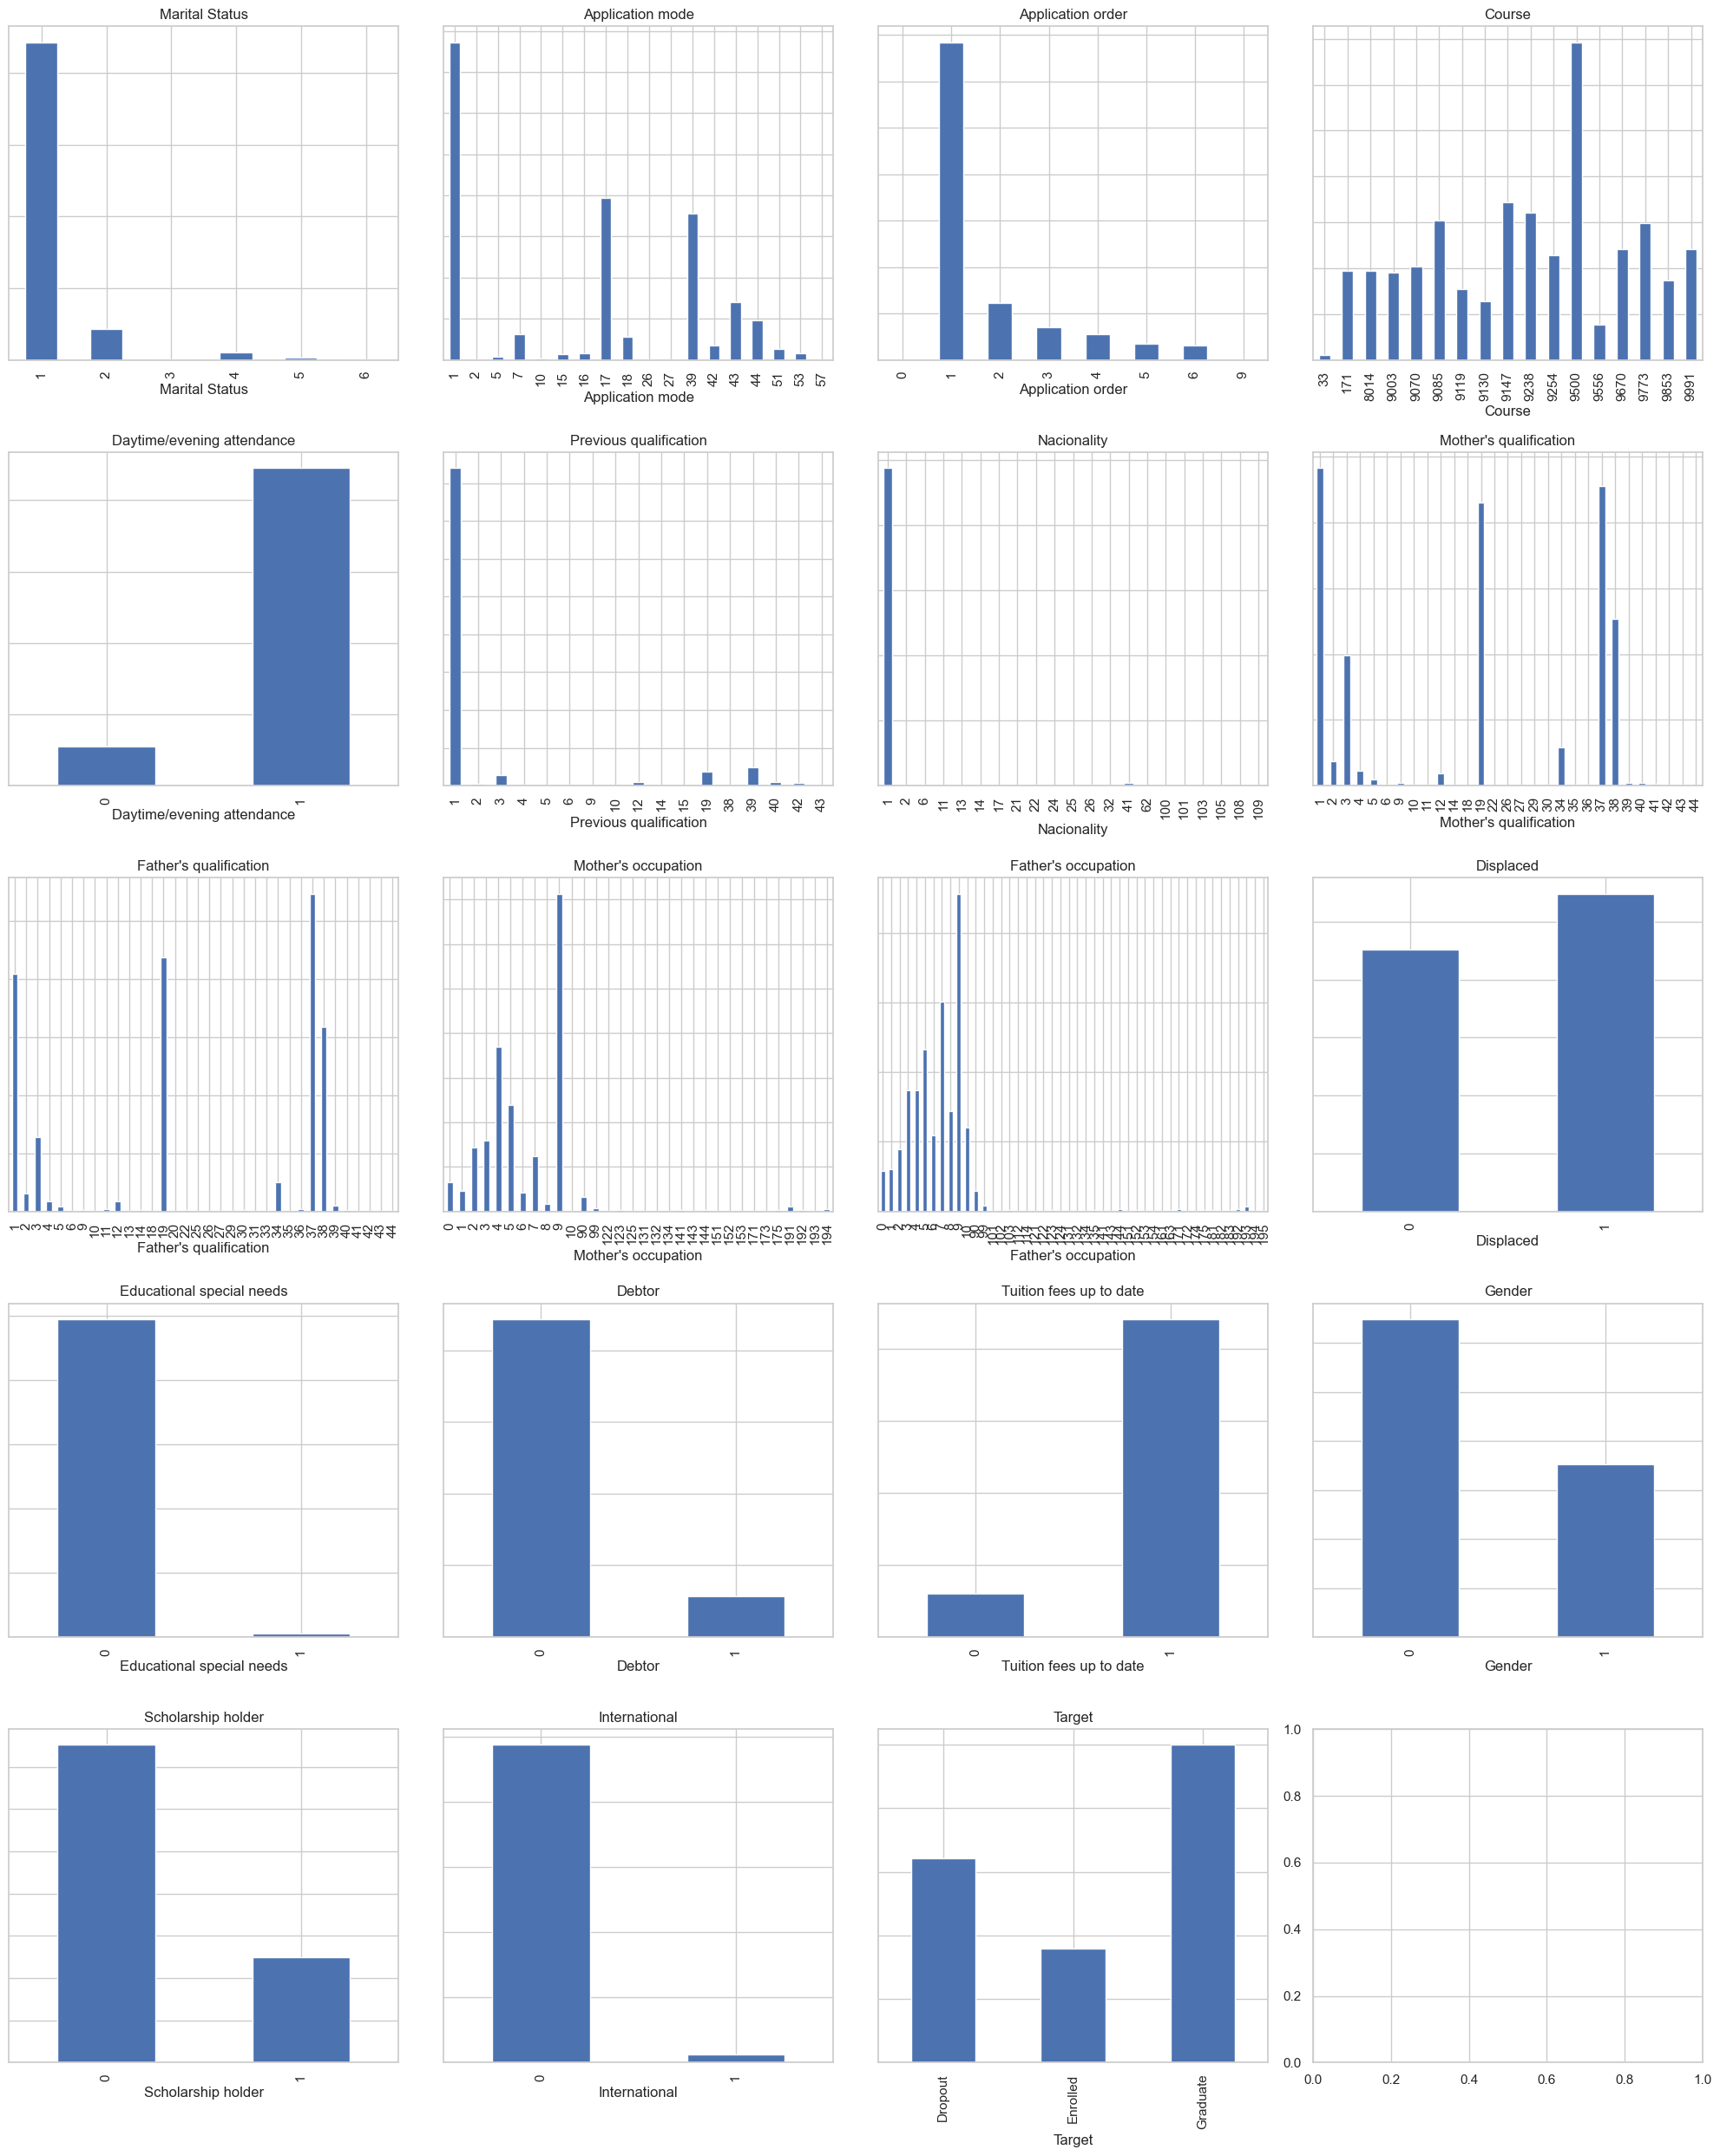

<Figure size 640x480 with 0 Axes>

In [215]:
# loop through categorical columns and create barplot for each
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
for i, col in enumerate(categorical_cols):
    row_idx = i // 4
    col_idx = i % 4
    vc = df_raw[col].value_counts(normalize=True)
    vc = vc.sort_index() # sort by category name
    vc.plot(kind="bar", ax=axes[row_idx, col_idx], rot=0)
    axes[row_idx, col_idx].set_title(col)
    for tick in axes[row_idx, col_idx].get_xticklabels():
        tick.set_rotation(90)
    for tick in axes[row_idx, col_idx].get_yticklabels():
        tick.set_visible(False)
fig.tight_layout()
plt.savefig('images/boxplotCatergricalCols.jpg', dpi=300)
plt.show()
plt.clf()

In [216]:
# Display the quantitative columns
display(df_raw) 

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Target_encoded
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate,2
4420,1,1,2,9773,1,1,120.0,105,1,1,...,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate,2


#### Plotting Gender Distribution by Marital Status

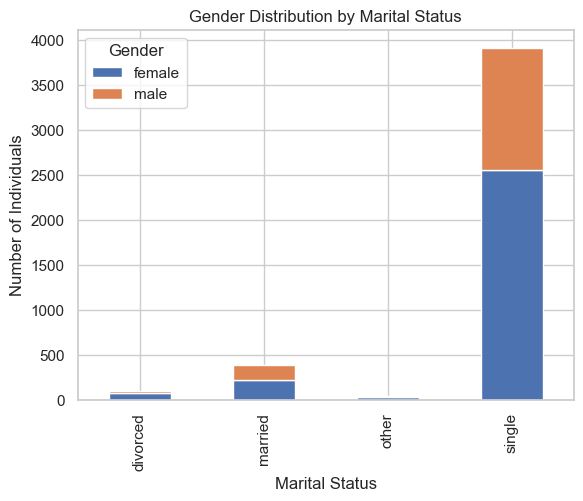

In [217]:
def plot_gender_distribution_by_marital_status(df):
    """
    This function takes a DataFrame and shows the gender distribution for each marital status.
    
    Returns:
    Shows gender distribution for each marital status in a bar plot.
    """
    # Group the data by 'Marital_Status' and 'Gender' and count the number of occurrences in each group
    gender_distribution = df.groupby(['Marital Status', 'Gender']).size().unstack().fillna(0)
    
    # Plotting the data
    gender_distribution.plot(kind='bar', stacked=True)
    
    # Adding labels and title
    plt.xlabel('Marital Status')
    plt.ylabel('Number of Individuals')
    plt.title('Gender Distribution by Marital Status')
    plt.legend(title='Gender')
    
    # Display the plot
    plt.show()

plot_gender_distribution_by_marital_status(df)



#### Mapping Categorical Variables to Strings

In [218]:
# Define the mapping dictionaries for the specified columns
mapping_dict = {
    'Marital Status': {
        1: 'single', 2: 'married', 3: 'other', 4: 'divorced', 
        5: 'other', 6: 'other'
    },
    'Previous qualification': {
        1: 'Secondary education', 2: 'Higher education - bachelor\'s degree', 
        3: 'Higher education - degree', 4: 'Higher education - master\'s', 
        5: 'Higher education - doctorate', 6: 'Frequency of higher education', 
        9: '12th year of schooling - not completed', 10: '11th year of schooling - not completed', 
        12: 'Other - 11th year of schooling', 14: '10th year of schooling', 
        15: '10th year of schooling - not completed', 19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.', 
        38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.', 39: 'Technological specialisation course', 
        40: 'Higher education - degree (1st cycle)', 42: 'Professional higher technical course', 
        43: 'Higher education - master (2nd cycle)'
    },
    'Gender': {
        1: 'male', 0: 'female'
    }
}


# Convert numerical categorical variables to strings
def convert_numerical_categorical_to_strings(df, columns_mapping):
    for col, mapping in columns_mapping.items():
        df[col] = df[col].map(mapping)
    return df

# Apply the conversion function to the DataFrame
df = convert_numerical_categorical_to_strings(df_raw, mapping_dict)

print(f"Cleaned data has been saved in {display(df.head(5))} as 'cleaned_data.csv'.")


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Target_encoded
0,single,17,5,171,1,Secondary education,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
1,single,15,1,9254,1,Secondary education,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,2
2,single,1,5,9070,1,Secondary education,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
3,single,17,2,9773,1,Secondary education,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,2
4,married,39,1,8014,0,Secondary education,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,2


Cleaned data has been saved in None as 'cleaned_data.csv'.


#### Distribution of Gender
The following code creates a bar plot to visualise the distribution of gender among the students.

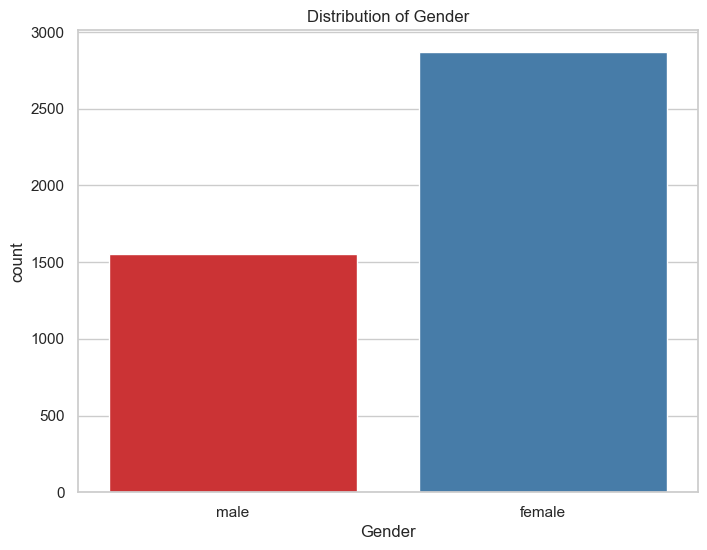

In [219]:
# Creating a bar plot for the distribution of Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette="Set1")

# Adding title to the plot
plt.title('Distribution of Gender')

# Displaying the plot
plt.show()

#### Marital Status vs Gender
The following code creates a stacked bar plot to visualise the distribution of marital statuses among students, segmented by gender.

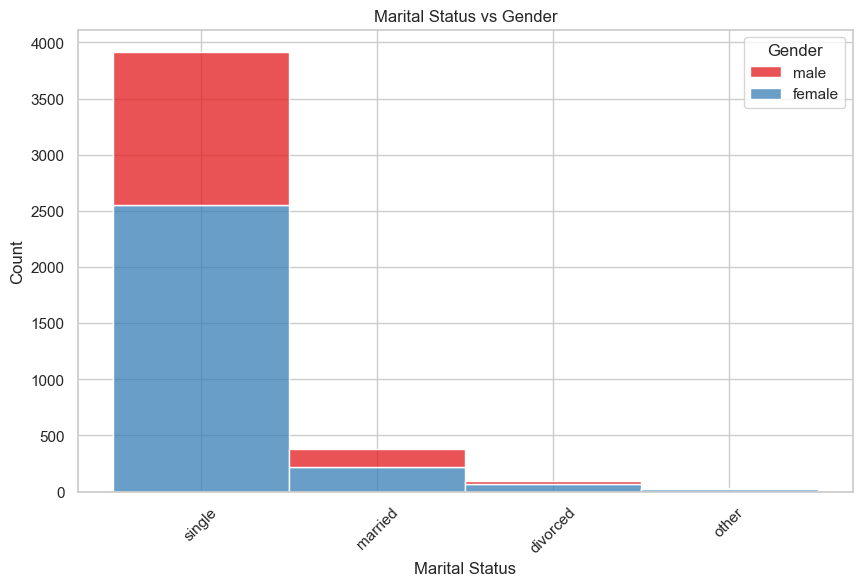

In [220]:
# Creating a stacked bar plot for Marital Status vs Gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Marital Status', hue='Gender', multiple='stack', palette="Set1")

# Adding title and customizing the x-axis labels
plt.title('Marital Status vs Gender')
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

#### Previous Qualification vs Gender
The following code creates a stacked bar plot to visualise the distribution of previous qualifications among students, segmented by gender.

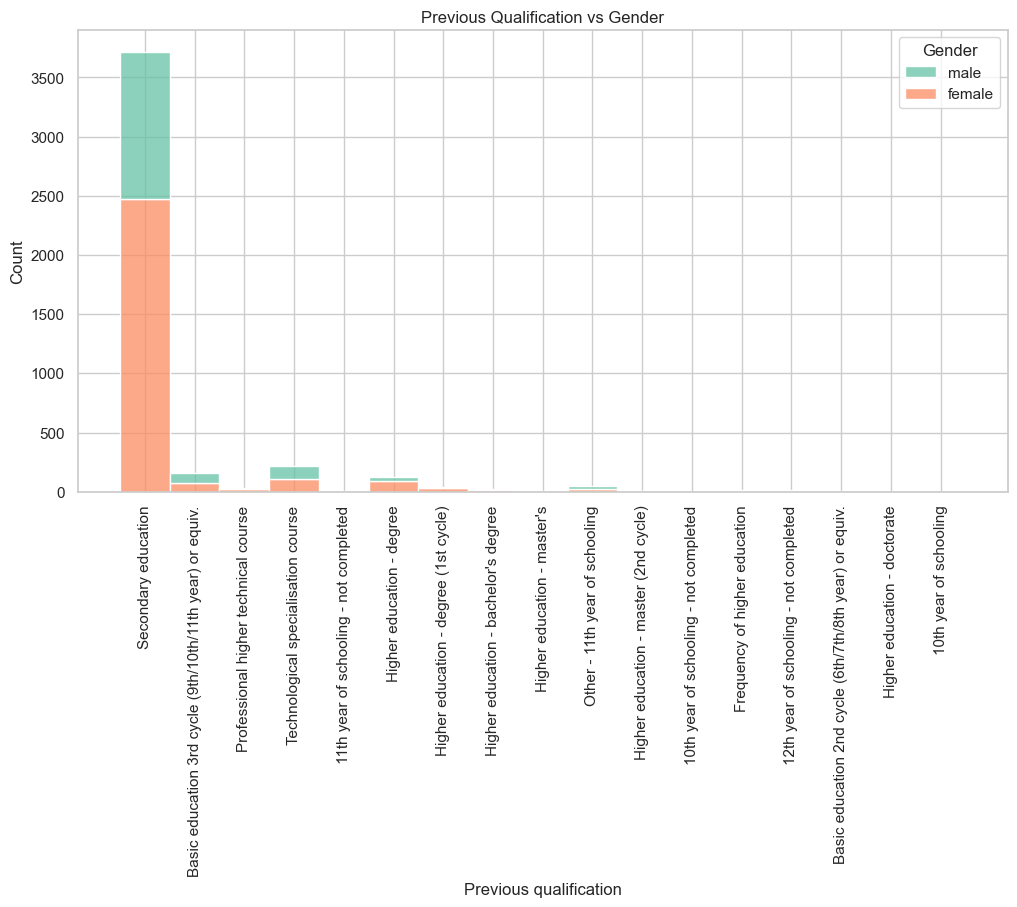

In [221]:
# Creating a stacked bar plot for Previous Qualification vs Gender
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Previous qualification', hue='Gender', multiple='stack', palette="Set2")

# Adding title and customizing the x-axis labels
plt.title('Previous Qualification vs Gender')
plt.xticks(rotation=90)

# Displaying the plot
plt.show()


#### Proportion of Marital Status
The following code creates a pie chart to visualise the proportion of different marital statuses among the students.

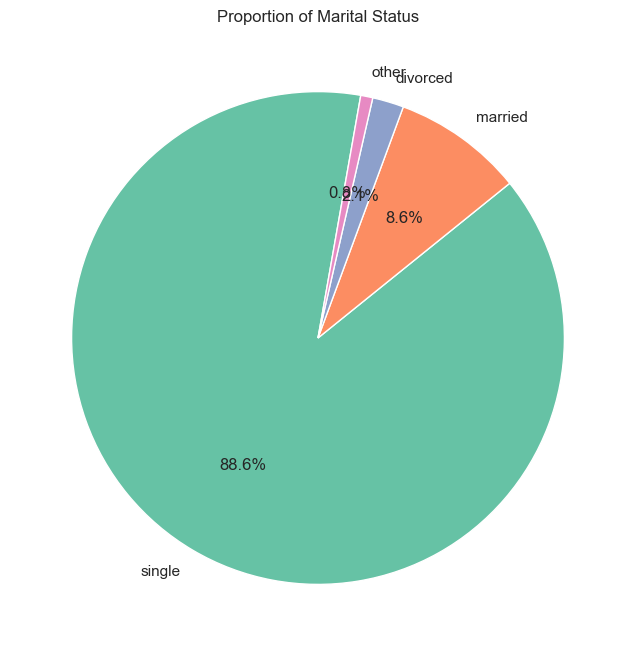

In [222]:
# Creating a pie chart for the proportion of Marital Status
plt.figure(figsize=(8, 8))
df['Marital Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set2"), startangle=80)

# Adding title and customizing the plot
plt.title('Proportion of Marital Status')
plt.ylabel('')  # Removing the default ylabel

# Displaying the plot
plt.show()

#### Age Distribution across Marital Status
The following code visualises the distribution of students' age at enrollment across different marital statuses using a box plot.

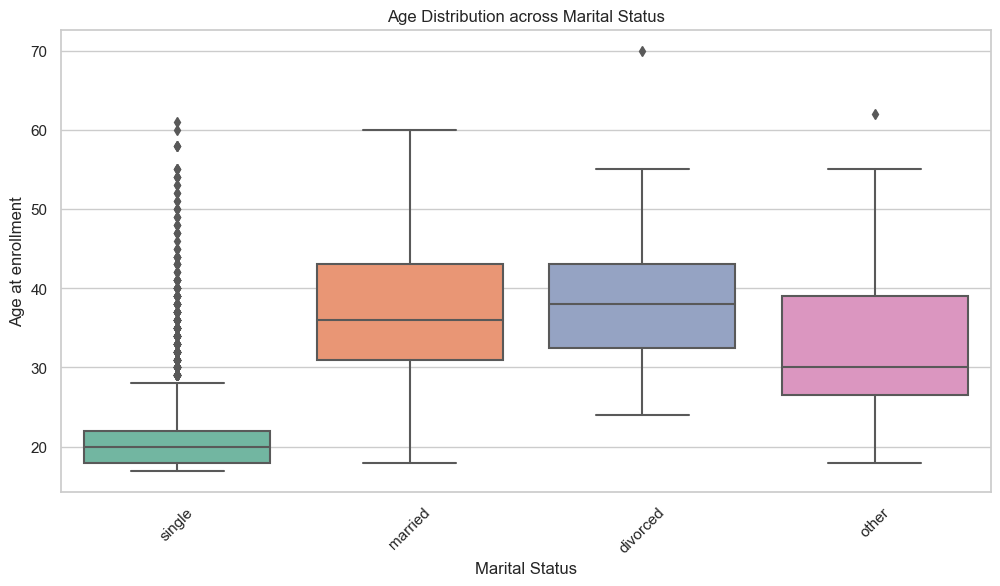

In [223]:
# Creating a box plot for Age at Enrollment across Marital Status
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Marital Status', y='Age at enrollment', palette="Set2")

# Adding title and customizing the x-axis labels
plt.title('Age Distribution across Marital Status')
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


#### Age Distribution across Previous Qualification
The following code visualises the distribution of students' age at enrollment across different previous qualifications using a box plot.

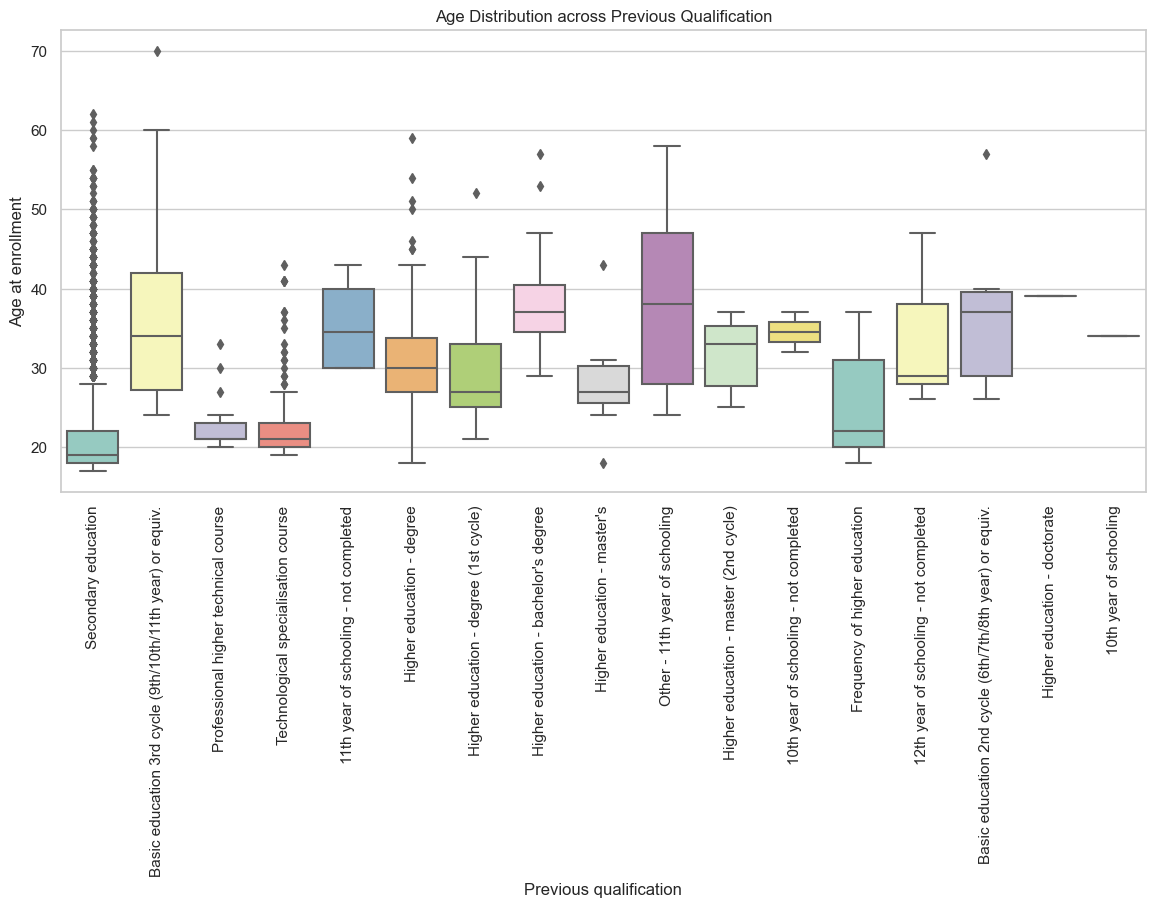

In [224]:
# Creating a box plot for Age at Enrollment across Previous Qualification
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Previous qualification', y='Age at enrollment', palette="Set3")

# Adding title and customizing the x-axis labels
plt.title('Age Distribution across Previous Qualification')
plt.xticks(rotation=90)

# Displaying the plot
plt.show()

#### Student Distribution by Course and Target
The following code groups students by their course and target outcome, renames course IDs to course names, 
and visualizes the distribution of students across different courses.

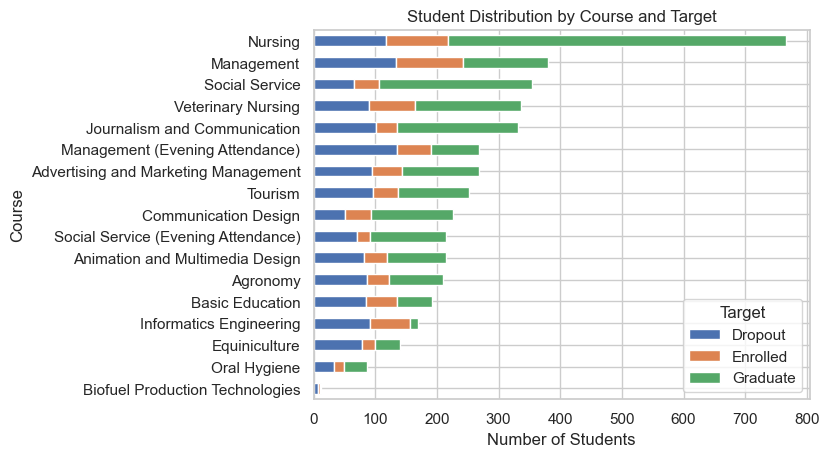

In [225]:
# Group by Course and Target, then pivot the table
student_course = df.groupby(['Course', 'Target']).size().reset_index().pivot(columns='Target', index='Course', values=0)

# Correctly map the course IDs to their names
course_names = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (Evening Attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equiniculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (Evening Attendance)'
}

# Rename the index of the DataFrame using the course_names mapping
student_course = student_course.rename(index=course_names)

# Calculate the total number of students per course
student_course_total = student_course.sum(axis=1)

# Sort the courses by the total number of students
student_course_sorted = student_course_total.sort_values(ascending=True)

# Plot the data
student_course.loc[student_course_sorted.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.ylabel('Course')
plt.title('Student Distribution by Course and Target')
plt.show()


#### Distribution of Age at Enrollment
##### The following code visualizes the distribution of the 'Age at enrollment' variable and provides summary statistics to understand its characteristics.

/Users/youssef/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


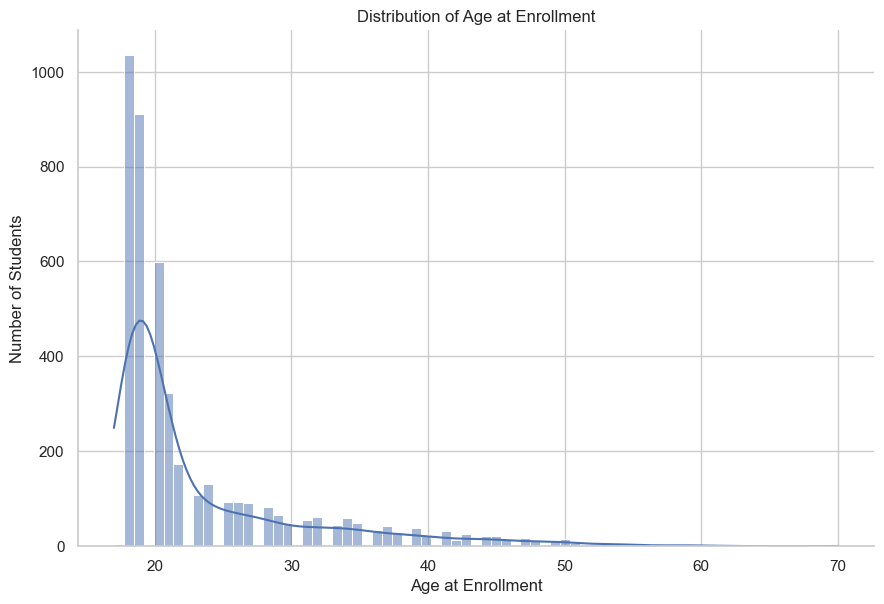

count    4424.000000
mean       23.265145
std         7.587816
min        17.000000
25%        19.000000
50%        20.000000
75%        25.000000
max        70.000000
Name: Age at enrollment, dtype: float64

The distribution of age at enrollment is positively skewed, indicating that the majority of students enroll at a relatively young age.
The mean age at enrollment is approximately 23.27 years old, with the most frequent age range falling between 19 to 25 years old.



In [226]:
# Plotting the distribution of 'Age at enrollment' with a kernel density estimate (KDE)
sns.displot(data=df, x='Age at enrollment', kde=True, height=6, aspect=1.5)

# Customizing the plot
plt.xlabel('Age at Enrollment')
plt.ylabel('Number of Students')
plt.title('Distribution of Age at Enrollment')
plt.show()

# Print summary statistics for 'Age at enrollment'
age_stats = df['Age at enrollment'].describe()
print(age_stats)

# Informative comment on the visualisation
print("""
The distribution of age at enrollment is positively skewed, indicating that the majority of students enroll at a relatively young age.
The mean age at enrollment is approximately {:.2f} years old, with the most frequent age range falling between 19 to 25 years old.
""".format(age_stats['mean']))


#### Tuition Fees Up-to-Date Analysis

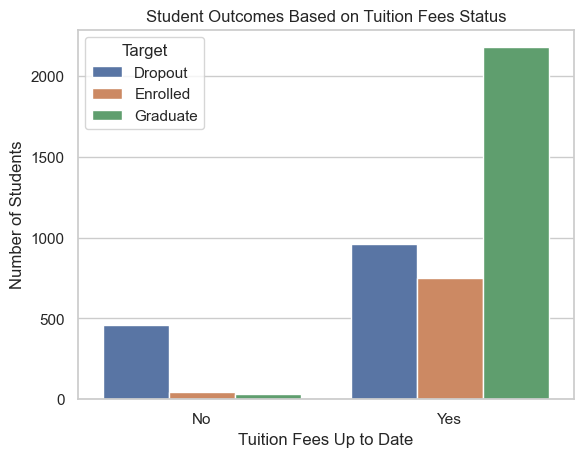

In [227]:
# Plotting the count of students based on tuition fees being up-to-date, colored by target outcome
sns.countplot(data=df, x="Tuition fees up to date", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

# Customizing the x-axis ticks to display 'No' and 'Yes' instead of 0 and 1
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# Adding labels and title
plt.xlabel('Tuition Fees Up to Date')
plt.ylabel('Number of Students')
plt.title('Student Outcomes Based on Tuition Fees Status')

# Displaying the plot
plt.show()

#### Mother's Occupation and Student Outcomes Analysis

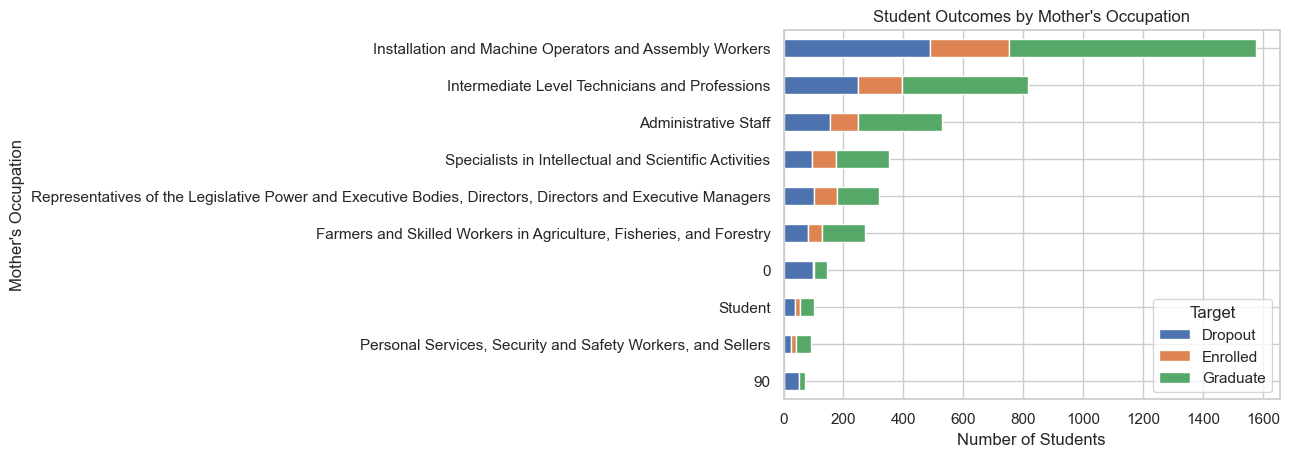

In [228]:
# Grouping the data by "Mother's occupation" and 'Target', then pivoting the table
student_moccupation = df.groupby(["Mother's occupation", 'Target']).size().reset_index().pivot(columns='Target', index="Mother's occupation", values=0)

# Renaming the index with descriptive occupation names
occupation_mapping = {
    1: 'Student', 2: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
    3: 'Specialists in Intellectual and Scientific Activities', 4: 'Intermediate Level Technicians and Professions', 
    5: 'Administrative Staff', 6: 'Personal Services, Security and Safety Workers, and Sellers', 
    7: 'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry', 
    8: 'Skilled Workers in Industry, Construction, and Craftsmen', 
    9: 'Installation and Machine Operators and Assembly Workers', 10: 'Unskilled Workers', 
    11: 'Armed Forces Professions', 12: 'Other Situation', 13: '(blank)', 14: 'Armed Forces Officers', 
    15: 'Armed Forces Sergeants', 16: 'Other Armed Forces personnel', 
    17: 'Directors of Administrative and Commercial Services', 18: 'Hotel, Catering, Trade, and Other Services Directors', 
    19: 'Specialists in the Physical Sciences, Mathematics, Engineering, and Related Techniques', 
    20: 'Health Professionals', 21: 'Teachers', 
    22: 'Specialists in Finance, Accounting, Administrative Organisation, and Public and Commercial relations', 
    23: 'Intermediate Level Science and Engineering Technicians and Professions', 
    24: 'Technicians and Professionals of Intermediate Level of Health', 
    25: 'Intermediate Level Technicians from Legal, Social, Sports, Cultural, and Similar Services', 
    26: 'Information and Communication Technology Technicians', 
    27: 'Office Workers, Secretaries in General, and Data Processing Operators', 
    28: 'Data, Accounting, Statistical, Financial Services, and Registry-related Operators', 
    29: 'Other Administrative Support Staff', 30: 'Personal Service Workers', 31: 'Sellers', 
    32: 'Personal Care workers and The Like', 33: 'Protection and Security Services Personnel', 
    34: 'Market-oriented Farmers and Skilled Agricultural and Animal Production Workers', 
    35: 'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, and Subsistence', 
    36: 'Skilled Construction Workers and The Like, except Electricians', 
    37: 'Skilled Workers in Metallurgy, Metalworking, and Similar', 
    38: 'Skilled workers in Electricity and Electronics', 
    39: 'Workers in Food Processing, Woodworking, and Clothing and Other industries and Crafts', 
    40: 'Fixed Plant and Machine Operators', 41: 'Assembly Workers', 
    42: 'Vehicle Drivers and Mobile Equipment Operators', 
    43: 'Unskilled Workers in Agriculture, Animal Production, and Fisheries and Forestry', 
    44: 'Unskilled Workers in Extractive Industry, Construction, Manufacturing, and Transport', 
    45: 'Meal Preparation Assistants', 46: 'Street Vendors (except food) and Street Service Providers'
}

student_moccupation = student_moccupation.rename(index=occupation_mapping)

# Summing the total number of students for each occupation
student_moccupation_total = student_moccupation.sum(axis=1)

# Sorting the occupations by the total number of students in ascending order
student_moccupation_sorted = student_moccupation_total.sort_values(ascending=True)

# Selecting the top 10 occupations by number of students
student_moccupation_top10 = student_moccupation_sorted[22:]

# Plotting the top 10 occupations in a horisontal stacked bar plot
student_moccupation.loc[student_moccupation_top10.index].plot(kind='barh', stacked=True)

# Adding labels and title to the plot
plt.xlabel('Number of Students')
plt.ylabel("Mother's Occupation")
plt.title("Student Outcomes by Mother's Occupation")
plt.show()

#### Check skwed data in nationality column

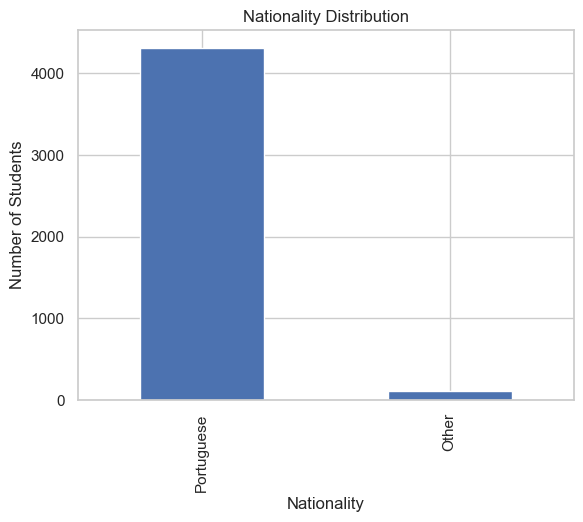

In [229]:
def plot_nationality_distribution(df, nationality_column='Nacionality'):
    """
    This function takes a DataFrame, tags all nationalities as 'Portuguese' if the nationality code is 1,
    and 'Other' for all other codes, then shows a bar plot of the distribution.
    
    Parameters:
    nationality_column (str): Name of the column containing nationality codes.
    
    Returns:
    Shows a bar plot of nacionalities distribution.
    """
    # Dictionary to map specific nationalities
    nationality_map = {1: 'Portuguese'}

    # Function to map nationalities to 'Other' if not in nationality_map
    def map_nationality(nationality):
        return nationality_map.get(nationality, 'Other')

    # Apply the mapping to the nationality column
    df['Nationality_Tag'] = df[nationality_column].map(map_nationality)

    # Group the data by 'Nationality_Tag' and count the number of occurrences in each group
    nationality_distribution = df['Nationality_Tag'].value_counts()

    # Plotting the data
    nationality_distribution.plot(kind='bar')

    # Adding labels and title
    plt.xlabel('Nationality')
    plt.ylabel('Number of Students')
    plt.title('Nationality Distribution')
    
    # Display the plot
    plt.show()

plot_nationality_distribution(df_raw)

In [230]:
# # Save the EDA data
data_dir = 'data/'  # Directory to save the data
df.to_csv(data_dir + 'EDA_data.csv', index=False)

#### End of the notebook 02_EDA_StudentsDropout